In [212]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.axes._axes as axes
np.random.seed(42)
sns.set()

In [213]:
df = pd.read_csv('11_data.csv', names=['x', 'y', 'label'])
df.head()

,x,y,label
0,0.78051,-0.063669,1
1,0.28774,0.291390,1
2,0.40714,0.178780,1
3,0.29230,0.421700,1
4,0.50922,0.352560,1


In [214]:
def stepFunction(t):
    return 1 if t >= 0 else 0

def prediction(X, W, b):
    return stepFunction((np.matmul(X, W) + b)[0])

# TODO: Fill in the code below to implement the perceptron trick.
# The function should receive as inputs the data X, the labels y,
# the weights W (as an array), and the bias b,
# update the weights and bias W, b, according to the perceptron
# algorithm, and return W and b.
def perceptronStep(X, y, W, b, learn_rate=0.01):
    # Fill in code
    for x, y in zip(X,y):
        pred = prediction(x, W, b)
        if pred > y[0]:
            # if pred is more than actual then minus
            W = W - learn_rate * x.reshape((2,1))
            b = b - learn_rate
        elif pred < y[0]:
            W = W + learn_rate * x.reshape((2,1))
            b = b + learn_rate
    return W,b    

In [215]:
# This function runs the perceptron algorithm repeatedly on the
# dataset,and returns a few of the boundary lines obtained in
# the iterations,for plotting purposes. Feel free to play with the
# learning rate and the num_epochs, and see your results plotted
# below.
def trainPerceptronAlgorithm(X, y, learn_rate=0.01, num_epochs=100):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2, 1))
    b = np.random.rand(1)[0] + x_max
    # These are the solution lines that get plotted below.
    boundary_lines = []
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W, b = perceptronStep(X, y, W, b, learn_rate)
        boundary_lines.append((-b / W[0][0], -b / W[1][0]))
    return boundary_lines

In [216]:
boundaryLines = trainPerceptronAlgorithm(np.array(df[['x', 'y']]),
               np.array(df[['label']]))

(0, 1)

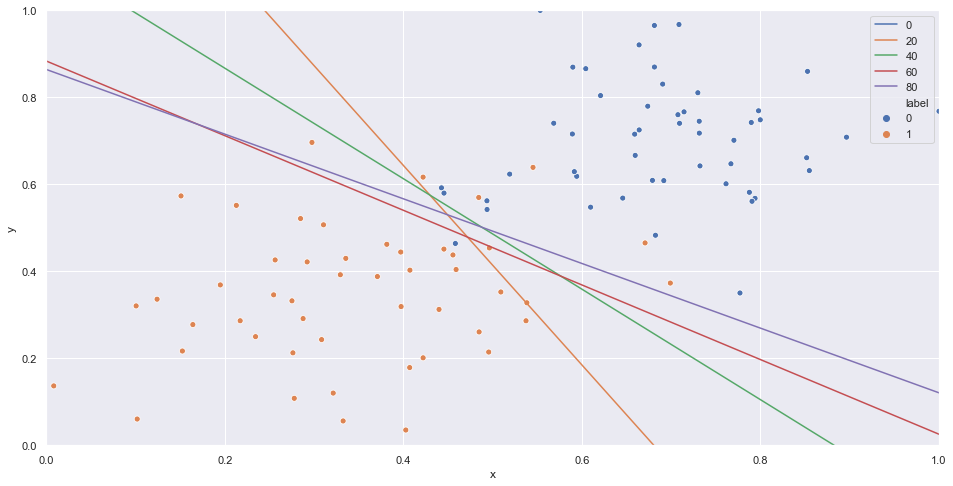

In [217]:
f, ax = plt.subplots(1, 1, figsize=(16, 8)); #type: _, axes.Axes
for i, c in enumerate(boundaryLines):
    if i % 20==0:
        sns.lineplot(x=[c[0], 0], y=[0, c[1]], label=str(i))
sns.scatterplot(data=df, x='x', y='y', hue='label', ax=ax)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)